### Code to Create Entropy Comparison Figures

In [118]:
%run ././SimulationCode.ipynb
%run ././ComputedVals.ipynb

In [119]:
from matplotlib.legend_handler import HandlerTuple

In [120]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(51, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * -90,
                **text_kwargs,
            )

In [92]:
### 0.4 and 4.9 are the alpha values that minimize ENTROPY ONLY

In [93]:
alpha, gamma = 0.4, 1
n_vals = [(20, normalize20), (50, normalize50)]
rounds = 40
trials = 100

network_type = 'homogeneously_mixing'
prior = faceprior
response_type = 'Face'

hf_caa_dfs = {'20':[], '50':[]}
hf_centola_dfs = {'20':[], '50':[]}

for tup in n_vals:
    n = tup[0]
    G, pairs = gen_network(n, network_type, rounds)
    for t in range(trials):
        
        caaG, caaDF = CAA_simulation(G, pairs, 'H', prior, rounds, alpha, gamma, response_type)
        baselineG, baselineDF = centola_simulation(G, pairs, 'H', prior, rounds, response_type)
        if n == 20:
            hf_caa_dfs['20'].append(caaDF)
            hf_centola_dfs['20'].append(baselineDF)
        else:
            hf_caa_dfs['50'].append(caaDF)
            hf_centola_dfs['50'].append(baselineDF)

In [94]:
alpha, gamma = 0.4, 1
n_vals = [(20, normalize20), (50, normalize50)]
rounds = 40
trials = 100

network_type = 'spatially_embedded'
prior = faceprior
response_type = 'Face'

sf_caa_dfs = {'20':[], '50':[]}
sf_centola_dfs = {'20':[], '50':[]}

for tup in n_vals:
    n = tup[0]
    G, pairs = gen_network(n, network_type, rounds)
    for t in range(trials):
        
        caaG, caaDF = CAA_simulation(G, pairs, 'H', prior, rounds, alpha, gamma, response_type)
        baselineG, baselineDF = centola_simulation(G, pairs, 'H', prior, rounds, response_type)
        if n == 20:
            sf_caa_dfs['20'].append(caaDF)
            sf_centola_dfs['20'].append(baselineDF)
        else:
            sf_caa_dfs['50'].append(caaDF)
            sf_centola_dfs['50'].append(baselineDF)

In [95]:
alpha, gamma = 4.9, 1
n_vals = [(20, normalize20), (50, normalize50)]
rounds = 40
trials = 100

network_type = 'spatially_embedded'
prior = htprior
response_type = 'HT'

sh_caa_dfs = {'20':[], '50':[]}
sh_centola_dfs = {'20':[], '50':[]}

for tup in n_vals:
    n = tup[0]
    G, pairs = gen_network(n, network_type, rounds)
    for t in range(trials):
        
        caaG, caaDF = CAA_simulation(G, pairs, 'S', prior, rounds, alpha, gamma, response_type)
        baselineG, baselineDF = centola_simulation(G, pairs, 'S', prior, rounds, response_type)
        if n == 20:
            sh_caa_dfs['20'].append(caaDF)
            sh_centola_dfs['20'].append(baselineDF)
        else:
            sh_caa_dfs['50'].append(caaDF)
            sh_centola_dfs['50'].append(baselineDF)

In [96]:
alpha, gamma = 4.9, 1
n_vals = [(20, normalize20), (50, normalize50)]
rounds = 40
trials = 100

network_type = 'homogeneously_mixing'
prior = htprior
response_type = 'HT'

hh_caa_dfs = {'20':[], '50':[]}
hh_centola_dfs = {'20':[], '50':[]}

for tup in n_vals:
    n = tup[0]
    G, pairs = gen_network(n, network_type, rounds)
    for t in range(trials):
        
        caaG, caaDF = CAA_simulation(G, pairs, 'S', prior, rounds, alpha, gamma, response_type)
        baselineG, baselineDF = centola_simulation(G, pairs, 'S', prior, rounds, response_type)
        if n == 20:
            hh_caa_dfs['20'].append(caaDF)
            hh_centola_dfs['20'].append(baselineDF)
        else:
            hh_caa_dfs['50'].append(caaDF)
            hh_centola_dfs['50'].append(baselineDF)

In [97]:
## Gotta compute normalized avg entropies for the experiments and I have the ones for the control
#normalized_avg_entropies=[hf_avg_normalized, sf_avg_normalized, hh_avg_normalized, sh_avg_normalized]

hf_exp_avg_entropy = hf_avg_normalized
sf_exp_avg_entropy = sf_avg_normalized
hh_exp_avg_entropy = hh_avg_normalized
sh_exp_avg_entropy = sh_avg_normalized

In [98]:
hf_caa_entropies = []
for df in hf_caa_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    hf_caa_entropies.append(normalized)
    
for df in hf_caa_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    hf_caa_entropies.append(normalized)

hf_caa_avg_entropy = np.mean(hf_caa_entropies, axis=0)

In [99]:
hf_control_entropies = []
for df in hf_centola_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    hf_control_entropies.append(normalized)
    
for df in hf_centola_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    hf_control_entropies.append(normalized)

hf_control_avg_entropy = np.mean(hf_control_entropies, axis=0)

In [100]:
sf_caa_entropies = []
for df in sf_caa_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    sf_caa_entropies.append(normalized)
    
for df in sf_caa_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    sf_caa_entropies.append(normalized)

sf_caa_avg_entropy = np.mean(sf_caa_entropies, axis=0)

In [101]:
sf_control_entropies = []
for df in sf_centola_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    sf_control_entropies.append(normalized)
    
for df in sf_centola_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    sf_control_entropies.append(normalized)

sf_control_avg_entropy = np.mean(sf_control_entropies, axis=0)

In [102]:
hh_caa_entropies = []
for df in hh_caa_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    hh_caa_entropies.append(normalized)
    
for df in hh_caa_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    hh_caa_entropies.append(normalized)

hh_caa_avg_entropy = np.mean(hh_caa_entropies, axis=0)

In [103]:
hh_control_entropies = []
for df in hh_centola_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    hh_control_entropies.append(normalized)
    
for df in hh_centola_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    hh_control_entropies.append(normalized)

hh_control_avg_entropy = np.mean(hh_control_entropies, axis=0)

In [104]:
sh_caa_entropies = []
for df in sh_caa_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    sh_caa_entropies.append(normalized)
    
for df in sh_caa_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    sh_caa_entropies.append(normalized)

sh_caa_avg_entropy = np.mean(sh_caa_entropies, axis=0)

In [105]:
sh_control_entropies = []
for df in sh_centola_dfs['20']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize20
    sh_control_entropies.append(normalized)
    
for df in sh_centola_dfs['50']:
    ent = np.array(compute_entropy(df))
    normalized = ent/normalize50
    sh_control_entropies.append(normalized)

sh_control_avg_entropy = np.mean(sh_control_entropies, axis=0)

In [106]:
HH_exp = hh_exp_avg_entropy
HH_control = hh_control_avg_entropy
HH_caa = hh_caa_avg_entropy

SH_exp = sh_exp_avg_entropy
SH_control = sh_control_avg_entropy
SH_caa = sh_caa_avg_entropy

HF_exp = hf_exp_avg_entropy
HF_control = hf_control_avg_entropy
HF_caa = hf_caa_avg_entropy

SF_exp = sf_exp_avg_entropy
SF_control = sf_control_avg_entropy
SF_caa = sf_caa_avg_entropy

In [107]:
data = {'Trial': list(range(1, 41)),
        'Experimental Homogeneous Hashtag': HH_exp,
        'Centola Homogeneous Hashtag': HH_control,
        'CAA Homogeneous Hashtag': HH_caa,
        'Experimental Spatial Hashtag': SH_exp,
        'Centola Spatial Hashtag': SH_control,
        'CAA Spatial Hashtag': SH_caa,
        'Experimental Homogeneous Face': HF_exp,
        'Centola Homogeneous Face': HF_control,
        'CAA Homogeneous Face': HF_caa,
        'Experimental Spatial Face': SF_exp,
        'Centola Spatial Face': SF_control,
        'CAA Spatial Face': SF_caa}

In [117]:
df = pd.DataFrame(data, index=data['Trial'])
df.to_csv('Entropy Optimization/EntropyComparisonFig.csv')

In [115]:
def create_entropy_comparison_models():
    mosaic = [
                ["HT_control", "HT_CAA"],
                ["Face_control", "Face_CAA"],
             ]
    
    fig = plt.figure(figsize=(8, 9))
    axes = fig.subplot_mosaic(mosaic, sharey=True, sharex=True)
    #plt.figure(figsize=(12, 8))
    
    # upper left: hashtag, centola model
    # upper right: hashtag, CAA model
    # lower left: face, centola model
    # lower left: face, CAA model
    exp1 = axes['HT_control'].scatter(range(len(HH_exp)), HH_exp, marker='X', color='blue')
    axes['HT_control'].plot(range(len(HH_exp)), HH_exp, color='blue')
    
    control1 = axes['HT_control'].scatter(range(len(HH_control)), HH_control, marker='o', color='blue')
    axes['HT_control'].plot(range(len(HH_control)), HH_control, color='blue')
    
    exp2 = axes['HT_control'].scatter(range(len(SH_exp)), SH_exp, marker='X', color='red')
    axes['HT_control'].plot(range(len(SH_exp)), SH_exp, color='red')
    
    control2 = axes['HT_control'].scatter(range(len(SH_control)), SH_control, marker='o', color='red')
    axes['HT_control'].plot(range(len(SH_control)), SH_control, color='red')
    axes['HT_control'].set_ylabel('Entropy')
    axes['HT_control'].grid('on')
    
    # plt 2
    axes['HT_CAA'].scatter(range(len(HH_exp)), HH_exp, marker='X', color='blue')
    axes['HT_CAA'].plot(range(len(HH_exp)), HH_exp, color='blue')
    
    caa1 = axes['HT_CAA'].scatter(range(len(HH_caa)), HH_caa, marker='o', color='blue')
    axes['HT_CAA'].plot(range(len(HH_caa)), HH_caa, color='blue')
    
    axes['HT_CAA'].scatter(range(len(SH_exp)), SH_exp, marker='X', color='red')
    axes['HT_CAA'].plot(range(len(SH_exp)), SH_exp, color='red')
    
    caa2 = axes['HT_CAA'].scatter(range(len(SH_caa)), SH_caa, marker='o', color='red')
    axes['HT_CAA'].plot(range(len(SH_caa)), SH_caa, color='red')
    axes['HT_CAA'].grid('on')
    
    #plt3
    axes['Face_control'].scatter(range(len(HF_exp)), HF_exp, marker='X', color='blue')
    axes['Face_control'].plot(range(len(HF_exp)), HF_exp, color='blue')
    
    axes['Face_control'].scatter(range(len(HF_control)), HF_control, marker='o', color='blue')
    axes['Face_control'].plot(range(len(HF_control)), HF_control, color='blue')
    
    axes['Face_control'].scatter(range(len(SF_exp)), SF_exp, marker='X', color='red')
    axes['Face_control'].plot(range(len(SF_exp)), SF_exp, color='red')
    
    axes['Face_control'].scatter(range(len(SF_control)), SF_control, marker='o', color='red')
    axes['Face_control'].plot(range(len(SF_control)), SF_control, color='red')
    axes['Face_control'].set_ylabel('Entropy')
    axes['Face_control'].set_xlabel('Trial Number')
    axes['Face_control'].grid('on')
    
    # plt 4
    axes['Face_CAA'].scatter(range(len(HF_exp)), HF_exp, marker='X', color='blue')
    axes['Face_CAA'].plot(range(len(HF_exp)), HF_exp, color='blue')
    
    axes['Face_CAA'].scatter(range(len(HF_caa)), HF_caa, marker='o', color='blue')
    axes['Face_CAA'].plot(range(len(HF_caa)), HF_caa, color='blue')
    
    axes['Face_CAA'].scatter(range(len(SF_exp)), SF_exp, marker='X', color='red')
    axes['Face_CAA'].plot(range(len(SF_exp)), SF_exp, color='red')
    
    axes['Face_CAA'].scatter(range(len(SF_caa)), SF_caa, marker='o', color='red')
    axes['Face_CAA'].plot(range(len(SF_caa)), SF_caa, color='red')
    axes['Face_CAA'].set_xlabel('Trial Number')
    axes['Face_CAA'].grid('on')
    
    
    plt.suptitle(f'Comparison of Normalized Average Entropies')
    
    handles1 = [(exp1, exp2), (control1, control2)]
    labels1 = ['Experimental Average', 'Model Average']
    handles2 = [(exp1, control1), (exp2, control2)]
    labels2 = ['Homogeneously Mixing', 'Spatially Embedded']
    
    legend1 = fig.legend(handles1, labels1, handler_map={tuple: HandlerTuple(ndivide=None)}, ncol=2, fontsize=8, loc='center', bbox_to_anchor=(0.25, 0))
    legend2 = fig.legend(handles2, labels2, handler_map={tuple: HandlerTuple(ndivide=None)}, ncol=2, fontsize=8, loc='center', bbox_to_anchor=(0.75, 0))
    
    
    fig.add_artist(legend1)
    fig.add_artist(legend2)
    
    
    
    col_headers = ["Control Model", "CAA Model"]
    row_headers = ["Hashtag", "Face"]

    #fig, axes = plt.subplot_mosaic(mosaic, **subplots_kwargs)

    font_kwargs = dict(fontweight="bold", fontsize="large")
    add_headers(fig, col_headers=col_headers, row_headers=row_headers, **font_kwargs)

    #plt.show()
    plt.savefig('Entropy Optimization/Entropy_Comparison.png', bbox_inches='tight')
    #legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, ncol=2, loc='outside lower center', fontsize=8)
    
    #plt.show()
    #plt.savefig(save_title, bbox_inches='tight')
    

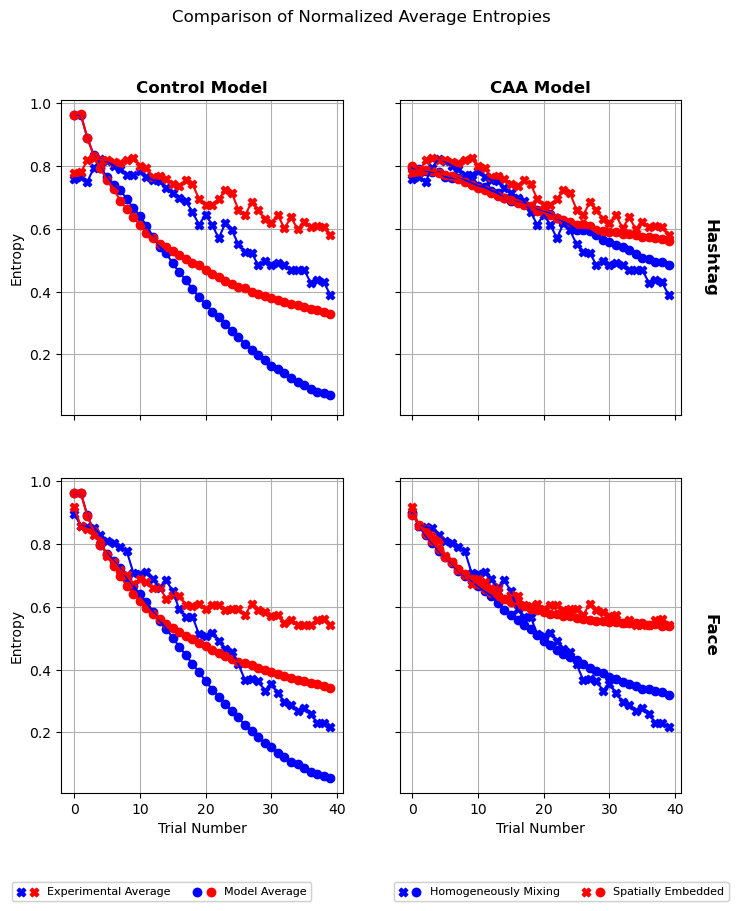

In [116]:
create_entropy_comparison_models()

In [113]:
# spatial red, homo blue
# x for experiment, circle for model

def create_entropy_difference_comparison_models():
    mosaic = [
                ["HT_control", "HT_CAA"],
                ["Face_control", "Face_CAA"],
             ]
    
    fig = plt.figure(figsize=(8, 9))
    axes = fig.subplot_mosaic(mosaic, sharey=True, sharex=True)
    
    homo = axes['HT_control'].scatter(range(1, 41), np.abs(HH_exp - HH_control), marker='o', color='blue')
    axes['HT_control'].plot(range(1, 41), np.abs(HH_exp - HH_control), color='blue')
    
    spatial = axes['HT_control'].scatter(range(1, 41), np.abs(SH_exp-SH_control), marker='o', color='red')
    axes['HT_control'].plot(range(1, 41), np.abs(SH_exp-SH_control), color='red')
    
    axes['HT_control'].set_ylabel('Distance')
    axes['HT_control'].grid('on')
    
    # plt 2
    axes['HT_CAA'].scatter(range(1, 41), np.abs(HH_exp-HH_caa), marker='o', color='blue')
    axes['HT_CAA'].plot(range(1, 41), np.abs(HH_exp-HH_caa), color='blue')
    
    axes['HT_CAA'].scatter(range(1, 41), np.abs(SH_exp-SH_caa), marker='o', color='red')
    axes['HT_CAA'].plot(range(1, 41), np.abs(SH_exp-SH_caa), color='red')

    axes['HT_CAA'].grid('on')
    
    #plt3
    axes['Face_control'].scatter(range(1, 41), np.abs(HF_exp-HF_control), marker='o', color='blue')
    axes['Face_control'].plot(range(1, 41), np.abs(HF_exp-HF_control), color='blue')
    
    axes['Face_control'].scatter(range(1, 41), np.abs(SF_exp-SF_control), marker='o', color='red')
    axes['Face_control'].plot(range(1, 41), np.abs(SF_exp-SF_control), color='red')
    
    axes['Face_control'].set_ylabel('Distance')
    axes['Face_control'].set_xlabel('Trial Number')
    axes['Face_control'].grid('on')
    
    # plt 4
    axes['Face_CAA'].scatter(range(1, 41), np.abs(HF_exp-HF_caa), marker='o', color='blue')
    axes['Face_CAA'].plot(range(1, 41), np.abs(HF_exp-HF_caa), color='blue')
    
    axes['Face_CAA'].scatter(range(1, 41), np.abs(SF_exp-SF_caa), marker='o', color='red')
    axes['Face_CAA'].plot(range(1, 41), np.abs(SF_exp-SF_caa), color='red')
    
    axes['Face_CAA'].set_xlabel('Trial Number')
    axes['Face_CAA'].grid('on')
    
    
    plt.suptitle(f'Average Distance from Normalized Experimental Entropy')
    
    handles1 = [homo, spatial]
    labels1 = ['Homogeneously Mixing', 'Spatially Embedded']
    
    legend1 = fig.legend(handles1, labels1, handler_map={tuple: HandlerTuple(ndivide=None)}, ncol=2, fontsize=8, loc='lower center')
    
    fig.add_artist(legend1)
    
    col_headers = ["Control Model", "CAA Model"]
    row_headers = ["Hashtag", "Face"]

    #fig, axes = plt.subplot_mosaic(mosaic, **subplots_kwargs)

    font_kwargs = dict(fontweight="bold", fontsize="large")
    add_headers(fig, col_headers=col_headers, row_headers=row_headers, **font_kwargs)

    #plt.show()
    plt.savefig('Entropy Optimization/Entropy_Distance_Comparison.png', bbox_inches='tight')
    #legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, ncol=2, loc='outside lower center', fontsize=8)
    
    #plt.show()
    #plt.savefig(save_title, bbox_inches='tight')
    

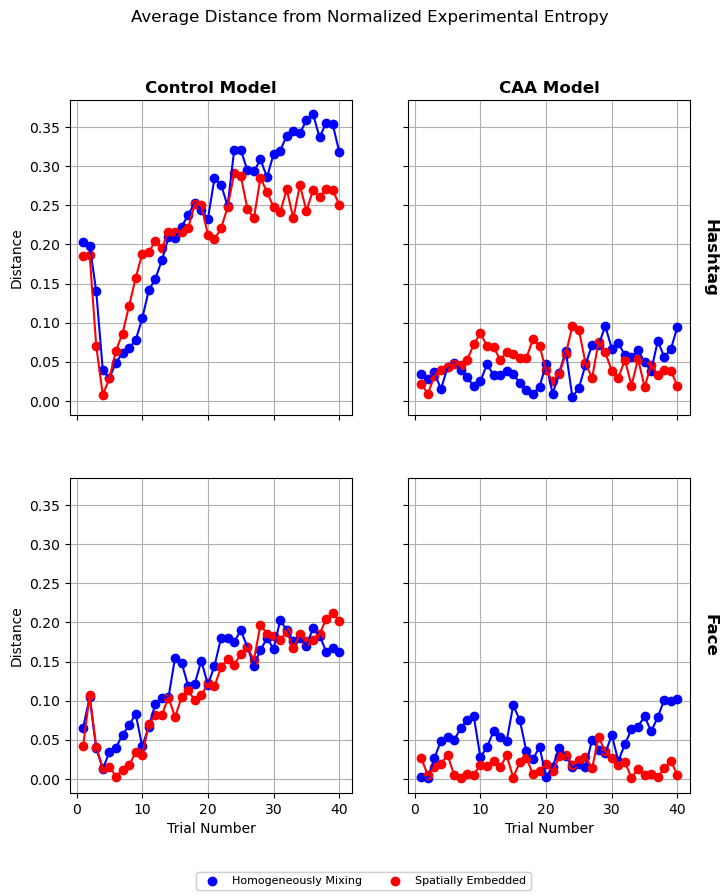

In [114]:
create_entropy_difference_comparison_models()